# Catalogue Analysis

## Import Catalogue dataset

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.listdir('projet_data_mining')

['.ipynb_checkpoints',
 'Catalogue.csv',
 'Catalogue_clustered.csv',
 'Clients.csv',
 'Client_preprossessed.csv',
 'Immatriculations.csv',
 'Marketing.csv',
 'Sujet.pdf']

In [3]:
import pandas as pd

In [4]:
catalogue_df = pd.read_csv('projet_data_mining/Catalogue.csv', encoding='latin1')

In [5]:
catalogue_df

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350
...,...,...,...,...,...,...,...,...,...
265,Audi,A2 1.4,75,courte,5,5,noir,False,18310
266,Audi,A2 1.4,75,courte,5,5,rouge,False,18310
267,Audi,A2 1.4,75,courte,5,5,blanc,True,12817
268,Audi,A2 1.4,75,courte,5,5,rouge,True,12817


## Catalogue Preprocessing

Checking for the type of columns values

In [6]:
catalogue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   marque     270 non-null    object
 1   nom        270 non-null    object
 2   puissance  270 non-null    int64 
 3   longueur   270 non-null    object
 4   nbPlaces   270 non-null    int64 
 5   nbPortes   270 non-null    int64 
 6   couleur    270 non-null    object
 7   occasion   270 non-null    bool  
 8   prix       270 non-null    int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 17.3+ KB


It's appear that these is no column that contains empty values, since the non-null column count for every column it's equal to 270.

Let's check if missing_values exists

In [7]:
missing_values = ['?', 'N/D', ' ']

for column in catalogue_df.columns:
    value_counts = catalogue_df[column].isin(missing_values).sum()
    print(f"Column '{column}':")
    for value in missing_values:
        count = (catalogue_df[column] == value).sum()
        print(f"  Value '{value}': {count} occurrences")

Column 'marque':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'nom':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'puissance':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'longueur':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'nbPlaces':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'nbPortes':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'couleur':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'occasion':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences
Column 'prix':
  Value '?': 0 occurrences
  Value 'N/D': 0 occurrences
  Value ' ': 0 occurrences


Delete colour column because there are no others differences between the same car with different colour

In [8]:
catalogue_df_dropped_colour = catalogue_df.drop(['couleur'], axis=1)

Delete duplicate rows

In [9]:
catalogue_drop_duplicates = catalogue_df_dropped_colour.drop_duplicates(subset=['nom','occasion'])

Dropping columns after reading the project specifications

In [10]:
catalogue_df_dropped = catalogue_drop_duplicates.drop(['marque', 'nom', 'occasion'], axis=1)

In [11]:
catalogue_df_dropped.head()

,puissance,longueur,nbPlaces,nbPortes,prix
0,272,très longue,5,5,50500
3,272,très longue,5,5,35350
10,150,longue,7,5,27340
11,150,longue,7,5,19138
20,55,courte,5,3,8540


Numerize longueur column values

In [12]:
def transform (x):
    L = ['courte','moyenne','longue','très longue']
    return L.index(x)+1

catalogue_df_dropped["longueur"] = catalogue_df_dropped["longueur"].apply(transform)

Normalize attributes with z-score

In [13]:
import numpy as np

In [14]:
def normalize (x) :
    return (x-np.mean(x))/np.std(x)

catalogue_df_norm = pd.DataFrame()
catalogue_df_norm["puissance"] = normalize (catalogue_df_dropped.puissance)
catalogue_df_norm["nbPlaces"]  = normalize (catalogue_df_dropped.nbPlaces)
catalogue_df_norm["nbPortes"]  = normalize (catalogue_df_dropped.nbPortes)
catalogue_df_norm["longueur"]  = normalize (catalogue_df_dropped.longueur)
catalogue_df_norm["prix"] = normalize (catalogue_df_dropped.prix)

In [15]:
catalogue_df_norm.head()

,puissance,nbPlaces,nbPortes,longueur,prix
0,1.265800,-0.353553,0.319438,1.471814,1.253336
3,1.265800,-0.353553,0.319438,1.471814,0.456589
10,-0.084004,2.828427,0.319438,0.502571,0.035338
11,-0.084004,2.828427,0.319438,0.502571,-0.396010
20,-1.135082,-0.353553,-3.130495,-1.435916,-0.953365


## Clustering Using K-means

Identifying Optimum number of clusters

**Using Elbow**

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('inertia')
    plt.show();

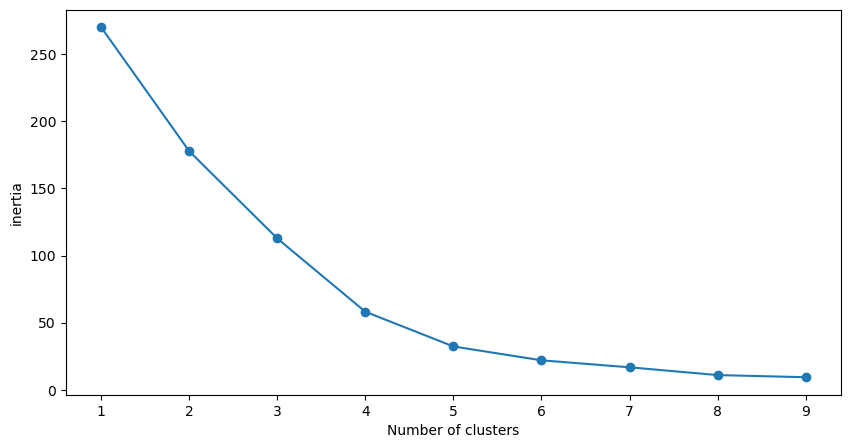

In [18]:
optimise_k_means(catalogue_df_norm, 10)

The best number of clusters given with elbow method it's around 4 and 5

**Using Silhouette Coefficient**

In [19]:
from sklearn.metrics import silhouette_score

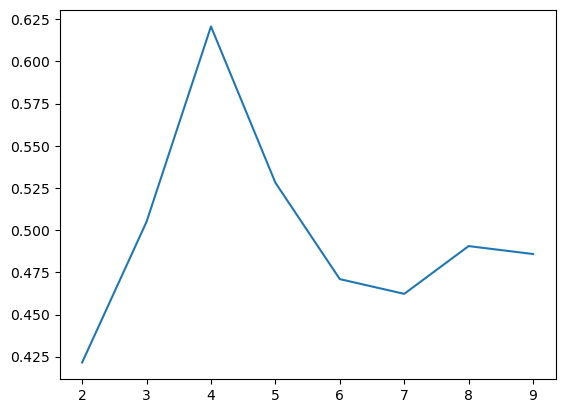

In [20]:
n_clusters = list (range (2, 10))
silhouettes = []
for k in n_clusters :
    kmeans = KMeans(n_clusters=k, random_state=123, n_init="auto")
    kmeans.fit(catalogue_df_norm)
    silhouettes.append (silhouette_score(catalogue_df_norm, kmeans.labels_))

plt.plot(n_clusters, silhouettes)

The best number of clusters give us with silhouette method it's 4 

In conclusion we will use 4 clusters for our training model

In [21]:
kmeans = KMeans(n_clusters=4, random_state=123, n_init="auto")
kmeans.fit(catalogue_df_norm)

KMeans(n_clusters=4, n_init='auto', random_state=123)

In [23]:
catalogue_drop_duplicates.insert(8, "cluster", kmeans.labels_)

In [24]:
catalogue_drop_duplicates.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,cluster
0,Volvo,S80 T6,272,très longue,5,5,False,50500,1
3,Volvo,S80 T6,272,très longue,5,5,True,35350,1
10,Volkswagen,Touran 2.0 FSI,150,longue,7,5,False,27340,2
11,Volkswagen,Touran 2.0 FSI,150,longue,7,5,True,19138,2
20,Volkswagen,Polo 1.2 6V,55,courte,5,3,True,8540,3


After analysing the new catalogue clustered file, we decide to attribute cluster names as:
    1: Luxury car
    2: Sport car
    3: Family car
    4: Urban car

In [26]:
merged_df = pd.merge(catalogue_df, catalogue_drop_duplicates, on=['marque','nom','puissance', 'longueur', 'nbPlaces', 'nbPortes', 'occasion', 'prix'], how='left')

In [27]:
merged_df.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,cluster
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,1
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,1
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500,1
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350,1
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350,1


In [28]:
merged_df.shape

(270, 10)

In [36]:
cluster_names = {
    0: "Luxury car",
    1: "Sport car",
    2: "Family car",
    3: "Urban car"
}

merged_df['cluster'] = merged_df['cluster'].replace(cluster_names)
catalogue_drop_duplicates['cluster'] = catalogue_drop_duplicates['cluster'].replace(cluster_names)

In [31]:
merged_df.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,cluster
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,Sport car
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,Sport car
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500,Sport car
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350,Sport car
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350,Sport car


Export our catalogue new dataset file

In [32]:
merged_df.to_excel("Catalogue_Clusters.xlsx")

# Immatriculation Analysis

## Import immatriculation dataset

In [33]:
immatriculation_df = pd.read_csv('projet_data_mining/Immatriculations.csv', encoding='latin1')

In [35]:
immatriculation_df

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310
...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817


## Merge Immatriculations with catalogue clustered

In [37]:
immatriculation_merged_df = pd.merge(immatriculation_df, catalogue_drop_duplicates, on=['marque','nom','puissance', 'longueur', 'nbPlaces', 'nbPortes', 'occasion', 'prix'], how='left')

In [38]:
immatriculation_merged_df

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,cluster
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Luxury car
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,Sport car
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029,Luxury car
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625,Luxury car
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310,Luxury car
...,...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910,Sport car
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450,Urban car
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900,Luxury car
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817,Luxury car


 # Client Analysis

## Import Client dataset


In [73]:
client_df = pd.read_csv('projet_data_mining/Clients.csv', encoding='latin1')

In [74]:
client_df

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,F,159,En Couple,2,false,3467 SB 72
1,53,M,594,En Couple,2,false,113 LY 42
2,20,F,949,En Couple,1,false,925 WK 87
3,29,M,571,En Couple,2,false,3279 RV 81
4,47,M,502,En Couple,1,false,82 RZ 54
...,...,...,...,...,...,...,...
99995,40,M,211,Célibataire,0,false,492 KF 53
99996,33,M,433,Célibataire,0,false,6346 NL 15
99997,21,M,599,En Couple,2,false,5803 LS 45
99998,22,M,229,En Couple,2,false,3783 DX 64


## Client Preprocessing


In [75]:
client_df.isnull().sum()

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64

In [76]:
client_df.columns

Index(['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge',
       '2eme voiture', 'immatriculation'],
      dtype='object')

In [77]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  object
 1   sexe                100000 non-null  object
 2   taux                100000 non-null  object
 3   situationFamiliale  100000 non-null  object
 4   nbEnfantsAcharge    100000 non-null  object
 5   2eme voiture        100000 non-null  object
 6   immatriculation     100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


Convert age, taux and nbEnfantsAcharge columns to numeric

In [78]:
client_df['age'] = pd.to_numeric(client_df['age'], errors='coerce')
client_df['taux'] = pd.to_numeric(client_df['taux'], errors='coerce')
client_df['nbEnfantsAcharge'] = pd.to_numeric(client_df['nbEnfantsAcharge'], errors='coerce')

In [79]:
client_df.replace(['?', 'N/D', ' '], pd.NA, inplace=True) #declare missing value

In [115]:
# Replace missing values
client_df['age'].fillna(client_df['age'].mean(), inplace=True)
client_df['sexe'].fillna(client_df['sexe'].mode()[0], inplace=True)
client_df['taux'].fillna(client_df['taux'].mean(), inplace=True)
client_df['situationFamiliale'].fillna(client_df['situationFamiliale'].mode()[0], inplace=True)
client_df['2eme voiture'].fillna(False, inplace=True)
client_df['nbEnfantsAcharge'].fillna(0, inplace=True)

In [83]:
client_df.age.unique()

array([25.        , 53.        , 20.        , 29.        , 47.        ,
       52.        , 58.        , 21.        , 42.        , 66.        ,
       54.        , 41.        , 63.        , 46.        , 43.        ,
       23.        , 49.        , 65.        , 24.        , 64.        ,
       45.        , 40.        , 28.        , 18.        , 32.        ,
       34.        , 36.        , 55.        , 79.        , 33.        ,
       39.        , 48.        , 71.        , 51.        , 57.        ,
       37.        , 81.        , 75.        , 62.        , 19.        ,
       30.        , 67.        , 26.        , 22.        , 80.        ,
       83.        , 82.        , 38.        , 35.        , 72.        ,
       70.        , 27.        , 77.        , 59.        , 60.        ,
       43.73333534, 31.        , 73.        , 76.        , 61.        ,
       44.        , 68.        , 69.        , 50.        , 78.        ,
       56.        , 74.        , 84.        , 43.73333534])

In [84]:
mean_age = client_df['age'].mean()
client_df.loc[client_df['age'] < 0, 'age'] = mean_age

In [85]:
client_df.taux.unique()

array([159., 594., 949., ..., 751., 882., 900.])

In [86]:
client_df.loc[client_df['taux'] < 544, 'taux'] = 544

In [116]:
client_df.sexe.unique()

array(['F', 'M'], dtype=object)

In [88]:
client_df = client_df.replace(to_replace=['Homme','Masculin'], value='M')
client_df = client_df.replace(to_replace=['Féminin','Femme'], value='F')

In [89]:
client_df.situationFamiliale.unique()

array(['En Couple', 'Célibataire', 'Seule', 'Marié(e)', 'Divorcée',
       'Seul'], dtype=object)

In [120]:
client_df = client_df.replace(to_replace=['Seule','Seul'], value='Célibataire')

In [121]:
client_df['2eme voiture'].unique()

array(['false', 'true'], dtype=object)

In [122]:
client_df = client_df.replace(to_replace=[False], value='false')

In [123]:
client_df.nbEnfantsAcharge.unique()

array([2., 1., 3., 4., 0.])

In [124]:
client_df.loc[client_df['nbEnfantsAcharge']<0, 'nbEnfantsAcharge'] = 0

In [125]:
#Drop duplicated client

In [126]:
client_drop_duplicates = client_df.drop_duplicates(subset=['immatriculation'])

In [127]:
 client_drop_duplicates.describe()

,age,taux,nbEnfantsAcharge
count,99989.000000,99989.000000,99989.000000
mean,43.781738,702.089663,1.243727
std,18.276850,256.203435,1.387031
min,18.000000,544.000000,0.000000
25%,28.000000,544.000000,0.000000
50%,42.000000,544.000000,1.000000
75%,57.000000,826.000000,2.000000
max,84.000000,1399.000000,4.000000


In [128]:
client_drop_duplicates.shape

(99989, 7)

## Merge Clients with Immatriculations clustered

In [129]:
client_merged_df = pd.merge(client_drop_duplicates, immatriculation_merged_df, on=['immatriculation'], how='left')

In [130]:
client_merged_df.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,cluster
0,25.0,F,544.0,En Couple,2.0,false,3467 SB 72,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880,Luxury car
1,53.0,M,594.0,En Couple,2.0,false,113 LY 42,Renault,Vel Satis 3.5 V6,245,très longue,5,5,noir,False,49200,Sport car
2,20.0,F,949.0,En Couple,1.0,false,925 WK 87,Jaguar,X-Type 2.5 V6,197,longue,5,5,blanc,False,37100,Luxury car
3,29.0,M,571.0,En Couple,2.0,false,3279 RV 81,Renault,Laguna 2.0T,170,longue,5,5,gris,False,27300,Luxury car
4,47.0,M,544.0,En Couple,1.0,false,82 RZ 54,Fiat,Croma 2.2,147,longue,5,5,bleu,False,24780,Luxury car


In [131]:
client_merged_dropped = client_merged_df.drop(['immatriculation', 'marque', 'nom', 'puissance', 'longueur', 'nbPlaces', 'nbPortes', 'couleur', 'occasion', 'prix'], axis=1)

In [132]:
client_merged_dropped.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,cluster
0,25.0,F,544.0,En Couple,2.0,false,Luxury car
1,53.0,M,594.0,En Couple,2.0,false,Sport car
2,20.0,F,949.0,En Couple,1.0,false,Luxury car
3,29.0,M,571.0,En Couple,2.0,false,Luxury car
4,47.0,M,544.0,En Couple,1.0,false,Luxury car


In [133]:
client_merged_drop_duplicates = client_merged_dropped.drop_duplicates(subset=['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', '2eme voiture', 'cluster'])

In [134]:
client_merged_drop_duplicates.shape

(45436, 7)

 # Model


## Vectorization

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
# Encode categorical columns
label_encoder = LabelEncoder()
client_merged_drop_duplicates['sexe'] = label_encoder.fit_transform(client_merged_drop_duplicates['sexe'])
client_merged_drop_duplicates['situationFamiliale'] = label_encoder.fit_transform(client_merged_drop_duplicates['situationFamiliale'])
client_merged_drop_duplicates['2eme voiture'] = label_encoder.fit_transform(client_merged_drop_duplicates['2eme voiture'])

## Training

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [142]:
X = client_merged_drop_duplicates.drop('cluster', axis=1)
y = client_merged_drop_duplicates['cluster']

In [143]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (Random Forest Classifier in this example)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.7299735915492958
Classification Report:
               precision    recall  f1-score   support

  Luxury car       0.77      0.81      0.79      5565
   Sport car       0.72      0.66      0.69      3182
   Urban car       0.14      0.12      0.13       341

    accuracy                           0.73      9088
   macro avg       0.54      0.53      0.54      9088
weighted avg       0.73      0.73      0.73      9088



In [145]:
from sklearn.svm import SVC

In [146]:
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:\n', classification_report_svm)

SVM Accuracy: 0.6123459507042254
SVM Classification Report:
               precision    recall  f1-score   support

  Luxury car       0.61      1.00      0.76      5565
   Sport car       0.00      0.00      0.00      3182
   Urban car       0.00      0.00      0.00       341

    accuracy                           0.61      9088
   macro avg       0.20      0.33      0.25      9088
weighted avg       0.37      0.61      0.47      9088



## Export the model

In [151]:
import joblib

# Assuming you have trained a Random Forest model named 'model'
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']